# s Grids

In [13]:
# imports
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from zdm import iteration as it
from zdm import errors_misc_functions as err

from zdm import io
from zdm.craco import loading
from zdm import figures

# Load

In [2]:
# imports
############## Load up ##############
input_dict=io.process_jfile('../Analysis/Cubes/craco_H0_Emax_cube.json')

# Deconstruct the input_dict
state_dict, cube_dict, vparam_dict = it.parse_input_dict(input_dict)

## Grid

In [61]:
survey,grid = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRAFT_CRACO_MC_alpha1_gamma_1000', NFRB=1000)

Loading survey: CRAFT_CRACO_MC_alpha1_gamma_1000
FRB survey succeffully initialised with  1000  FRBs
Initialised grid


# $s$, DM

## Test

In [4]:
NSNR=51
snrs=np.logspace(0,2,NSNR)

In [14]:
reload(err)
psnrs,dmpsnrs=err.get_sc_grid(grid, NSNR, snrs)

In [6]:
dmpsnrs.shape

(50, 1400)

In [7]:
dmvals = grid.dmvals

In [8]:
cmx = plt.get_cmap('cubehelix')

### Process the p(s,DM) grid

In [31]:
reload(figures)
cut_snrs, cut_dmvals, psDM = figures.proc_pgrid(dmpsnrs, snrs[0:-1], (0, snrs.max()),
                                                 grid.dmvals, (0, 2000.))

### Contours

In [24]:
reload(figures)
Alevels = figures.find_Alevels(dmpsnrs, [0.01, 0.1, 0.5])
Alevels

array([3.15599842e-06, 6.16470539e-05, 6.50584709e-04])

### Plot

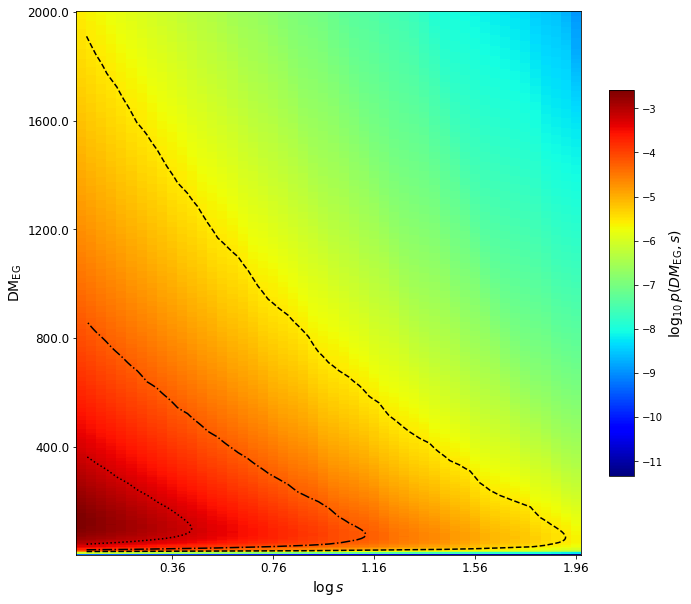

In [40]:
reload(figures)
# https://stackoverflow.com/questions/13384653/imshow-extent-and-aspect
plt.figure(figsize=(10,10))
ax = plt.gca()
im=plt.imshow(psDM.T,cmap='jet',origin='lower', 
                  interpolation='None',
                 # extent=[0., 2, 0, 2000.],
                  aspect='auto')
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
label='$\\log_{10} \, p(DM_{\\rm EG},s)$'
cbar.set_label(label,fontsize=14)
#
# Contours
#
styles=['--','-.',':']
cs=ax.contour(psDM.T,levels=np.log10(Alevels),origin='lower',colors="k",linestyles=styles)
#
# Ticks
tvals, ticks = figures.ticks_pgrid(np.log10(cut_snrs), fmt='str4')
plt.xticks(tvals, ticks, fontsize=12)

tvals, ticks = figures.ticks_pgrid(cut_dmvals)
plt.yticks(tvals, ticks, fontsize=12)
    

#
ax.set_xlabel(r'$\log s$', fontsize=14)
ax.set_ylabel(r'DM$_{\rm EG}$', fontsize=14)
plt.show()    

In [61]:
np.log10(1.584)

0.19975517725347472

# $s, z$

## Generate

In [62]:
reload(err)
psnrs,psz=err.get_sc_grid(grid, NSNR, snrs, calc_psz=True)

## Fuss

In [68]:
cut_snrs, cut_z, cut_psz = figures.proc_pgrid(psz, snrs[0:-1], (0, snrs.max()),
                                                 grid.zvals, (0, 2.))

In [69]:
Alevels = figures.find_Alevels(psz, [0.01, 0.1, 0.5])

## Plot

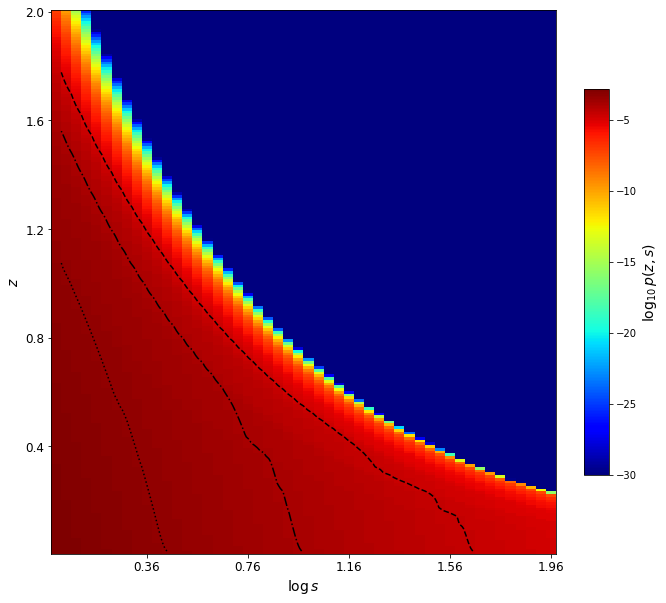

In [70]:
# https://stackoverflow.com/questions/13384653/imshow-extent-and-aspect
plt.figure(figsize=(10,10))
ax = plt.gca()
im=plt.imshow(cut_psz.T,cmap='jet',origin='lower', 
                  interpolation='None',
                 # extent=[0., 2, 0, 2000.],
              vmin=-30.,
                  aspect='auto')
# Color bar
cbar=plt.colorbar(im,fraction=0.046, shrink=1.2,aspect=15,pad=0.05)
label='$\\log_{10} \, p(z,s)$'
cbar.set_label(label,fontsize=14)
#
# Contours
#
styles=['--','-.',':']
cs=ax.contour(cut_psz.T,levels=np.log10(Alevels),origin='lower',colors="k",linestyles=styles)
#
# Ticks
tvals, ticks = figures.ticks_pgrid(np.log10(cut_snrs), fmt='str4')
plt.xticks(tvals, ticks, fontsize=12)

tvals, ticks = figures.ticks_pgrid(cut_z)
plt.yticks(tvals, ticks, fontsize=12)
    

#
ax.set_xlabel(r'$\log s$', fontsize=14)
ax.set_ylabel(r'$z$', fontsize=14)
plt.show()    

In [58]:
psz[0,:]

array([2.89612265e-10, 8.24427657e-12, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      